In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# Import Data

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data Inference
 * Concat Train and test before cleaning the null values and removing un-optimal features

In [3]:
train_data['train']  = 1
test_data['train']  = 0


In [4]:
data = pd.concat([train_data,test_data],axis =0)
print(len(data))
data.head()

2919


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [5]:
for i in data.columns:
    print(f'length of unique values in {i}',len(set(data[i])))
    print(f'some of the unique values in {i}',list(set(data[i]))[0:5])
    print('---------------------------------------------------------')

length of unique values in Id 2919
some of the unique values in Id [1, 2, 3, 4, 5]
---------------------------------------------------------
length of unique values in MSSubClass 16
some of the unique values in MSSubClass [160, 70, 40, 75, 45]
---------------------------------------------------------
length of unique values in MSZoning 6
some of the unique values in MSZoning [nan, 'FV', 'C (all)', 'RL', 'RM']
---------------------------------------------------------
length of unique values in LotFrontage 614
some of the unique values in LotFrontage [nan, nan, nan, nan, nan]
---------------------------------------------------------
length of unique values in LotArea 1951
some of the unique values in LotArea [16387, 8197, 8198, 8199, 8200]
---------------------------------------------------------
length of unique values in Street 2
some of the unique values in Street ['Grvl', 'Pave']
---------------------------------------------------------
length of unique values in Alley 3
some of the 

### Missing values

* Let's see the missing values of each feature

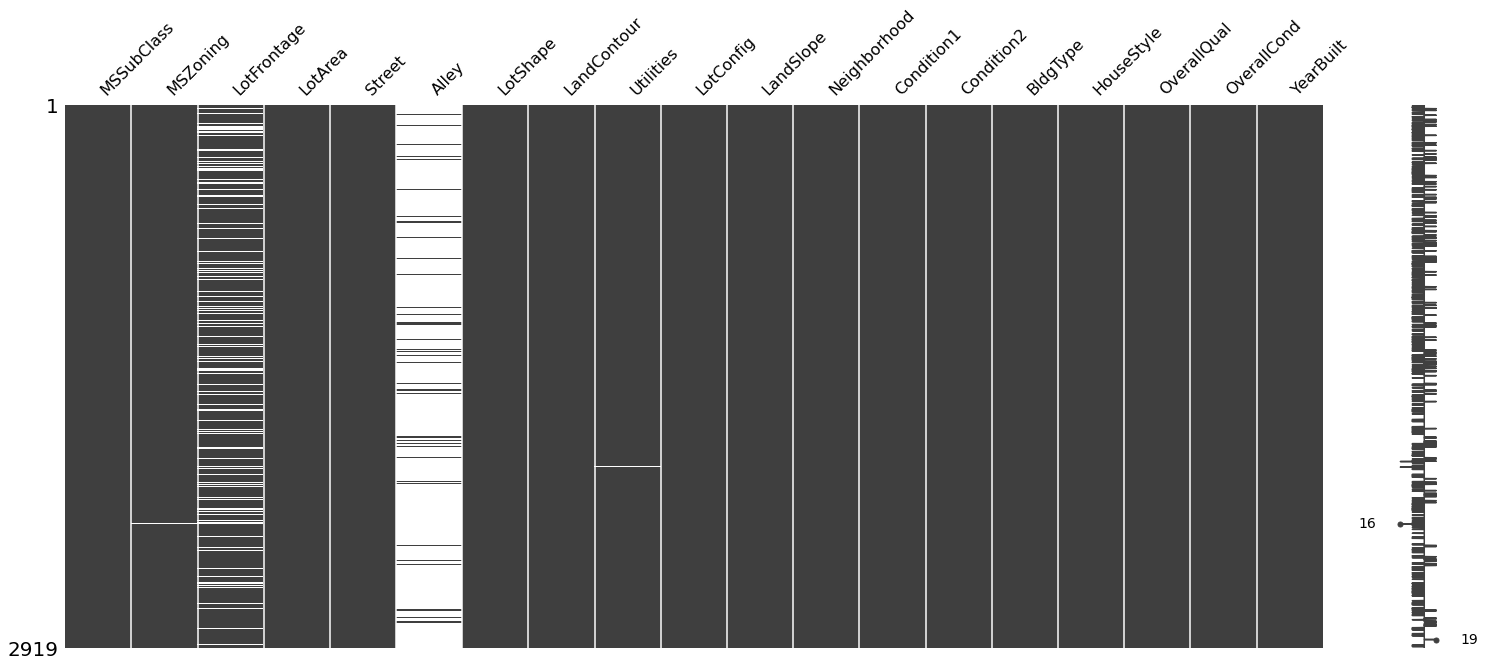

In [6]:
import missingno as msno 
msno.matrix(data.iloc[:,1:20])


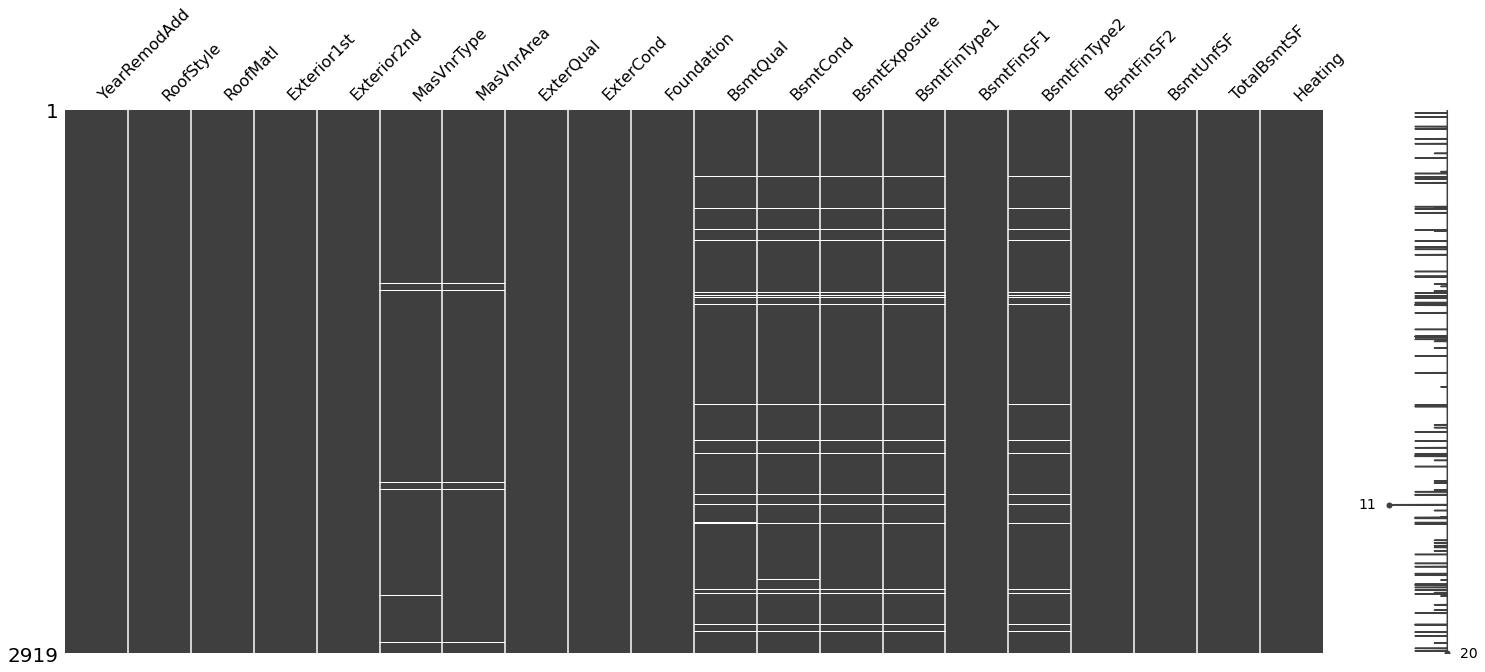

In [7]:
msno.matrix(data.iloc[:,20:40])


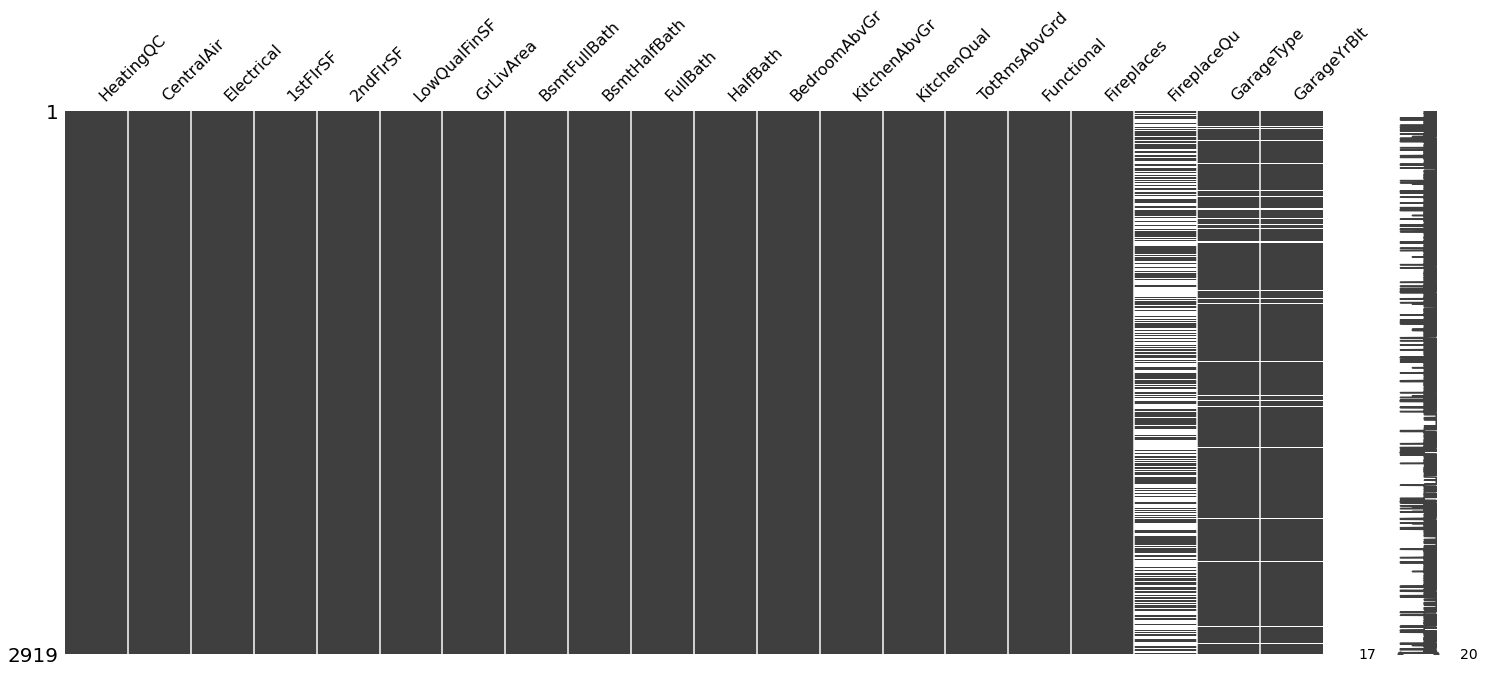

In [8]:
msno.matrix(data.iloc[:,40:60])


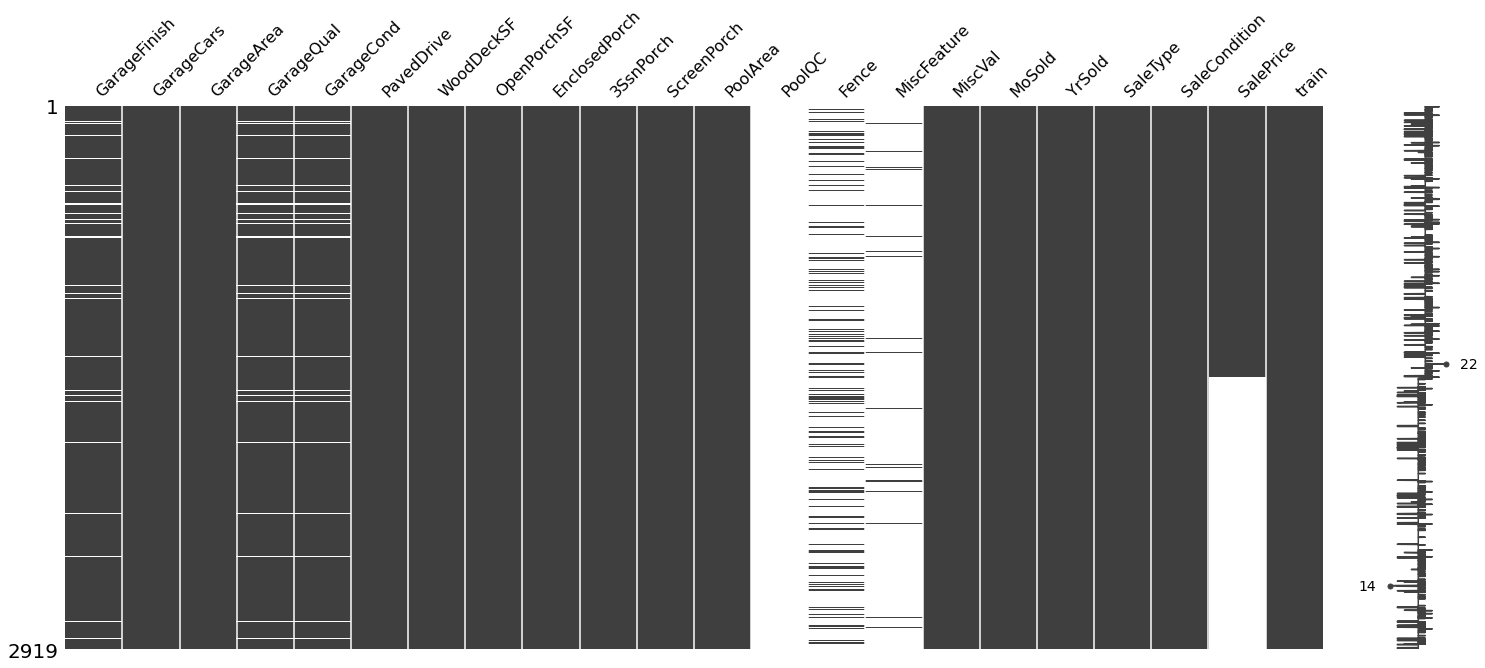

In [9]:
msno.matrix(data.iloc[:,60:])


* 'y' train data SalePrice alone used to train the model and predict test data SalePrice
* drop SalePrice from total data

In [10]:
y = train_data.SalePrice
data =data.drop(['SalePrice'],axis = 1)

# Data Cleaning and Data Manipulation

Let's separate the data into two categories 
* ojects which include columns of  'dtype' **object**
* numericals which include columns of  'dtype' **Int** or **float**

In [11]:
objects = data.select_dtypes(include=['object'])
numericals =data.select_dtypes(exclude=['object'])

Have a look at objects dtypes after separation

In [12]:
print(objects.dtypes)

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

look for null values

In [13]:
objects.isna().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

Look at **data_description.txt** file for more understanding

1. For Alley NA means no Alley access so fill with 'none'
2. For BsmtQual,BsmtCond and BsmtExposure NA means no basement so let's fill with 'none' and it also applies with 4 garage columns 
3. For FireplaceQu NA means no Fire place so fill with 'none' 
4. For PoolQC,Fence,MiscFeature NA means they don't have the respective values fill with 'none'
5. For Electrical,KitchenQual,Functional,MasVnrType,Exterior1st,Exterior2nd,MSZoning,Utilities and SaleType will fill the data with most occured value                     



In [14]:
object_none_fill = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','PoolQC','Fence','MiscFeature','GarageType','GarageFinish','GarageQual','GarageCond']
objects[object_none_fill] = objects[object_none_fill].fillna('none')

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
object_mode_fill = ['Electrical','KitchenQual','Functional','MasVnrType','Exterior1st','Exterior2nd','MSZoning','Utilities','SaleType']
objects[object_mode_fill] = objects[object_mode_fill].fillna(objects[object_mode_fill].mode().iloc[0])

so,now we cleared all the null values of  objects data Let's Change the data to numeric and also it's dtype. 
* Look at unique values of each column
* plot the countplots(barplots) for each feature 

In [16]:
for i in objects.columns:
    print(i,'-----',len(set(objects[i])),'-----',objects[i].dtype,'\n')


MSZoning ----- 5 ----- object 

Street ----- 2 ----- object 

Alley ----- 3 ----- object 

LotShape ----- 4 ----- object 

LandContour ----- 4 ----- object 

Utilities ----- 2 ----- object 

LotConfig ----- 5 ----- object 

LandSlope ----- 3 ----- object 

Neighborhood ----- 25 ----- object 

Condition1 ----- 9 ----- object 

Condition2 ----- 8 ----- object 

BldgType ----- 5 ----- object 

HouseStyle ----- 8 ----- object 

RoofStyle ----- 6 ----- object 

RoofMatl ----- 8 ----- object 

Exterior1st ----- 15 ----- object 

Exterior2nd ----- 16 ----- object 

MasVnrType ----- 4 ----- object 

ExterQual ----- 4 ----- object 

ExterCond ----- 5 ----- object 

Foundation ----- 6 ----- object 

BsmtQual ----- 5 ----- object 

BsmtCond ----- 5 ----- object 

BsmtExposure ----- 5 ----- object 

BsmtFinType1 ----- 7 ----- object 

BsmtFinType2 ----- 7 ----- object 

Heating ----- 6 ----- object 

HeatingQC ----- 5 ----- object 

CentralAir ----- 2 ----- object 

Electrical ----- 5 ----- object

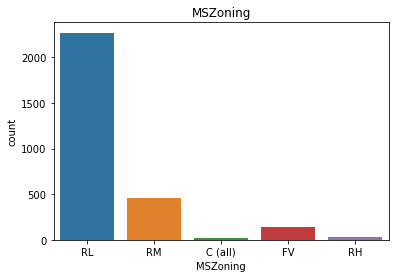

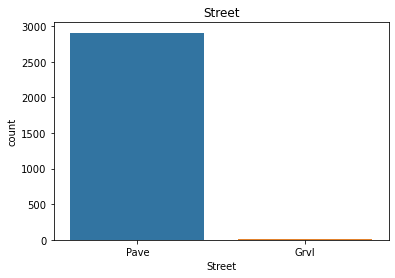

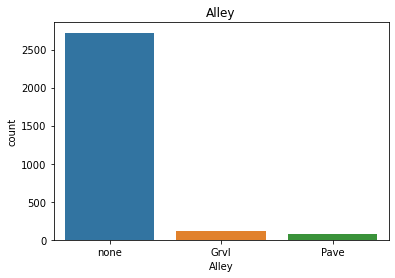

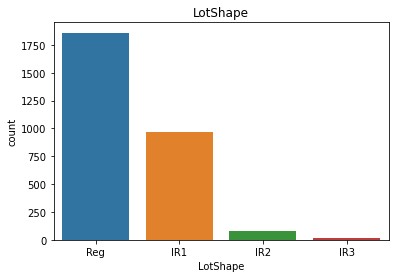

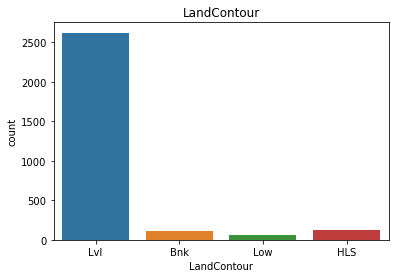

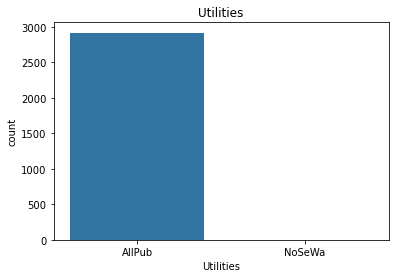

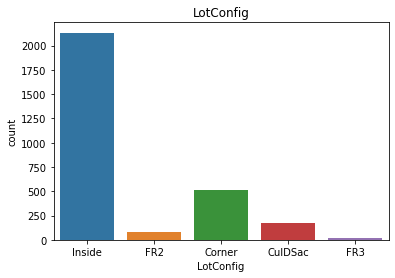

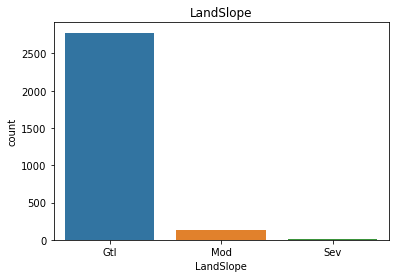

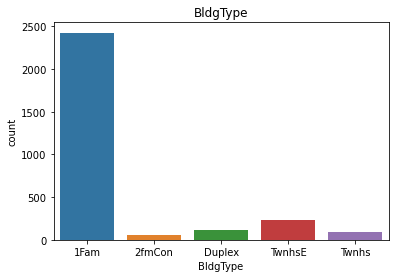

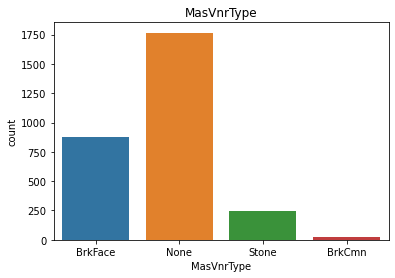

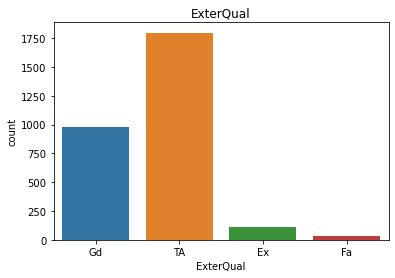

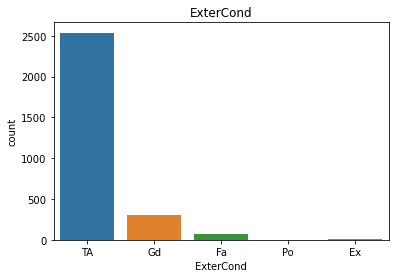

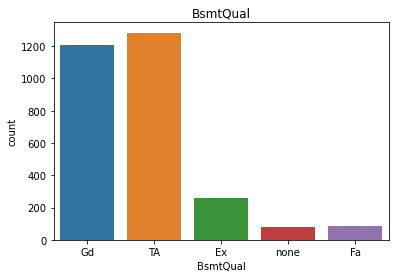

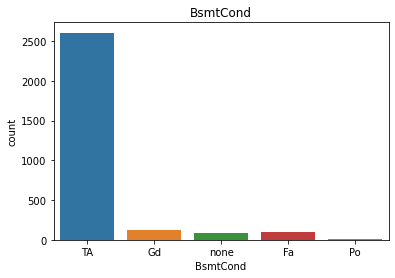

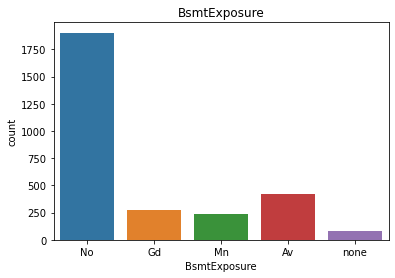

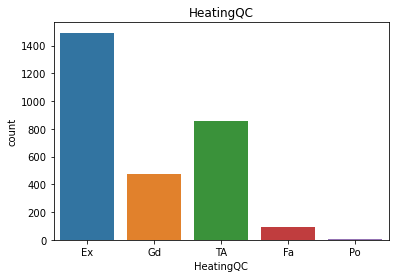

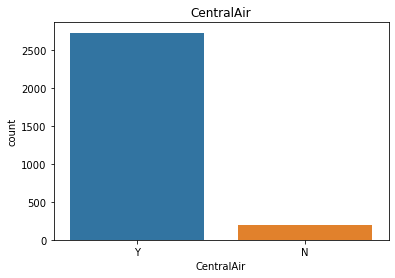

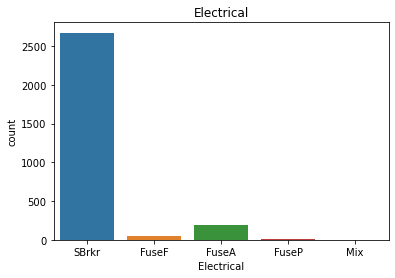

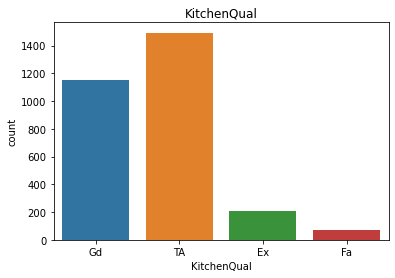

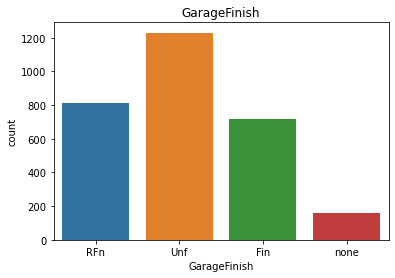

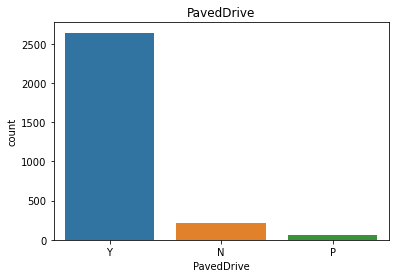

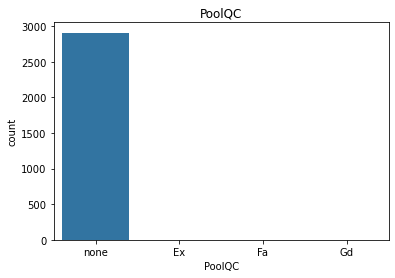

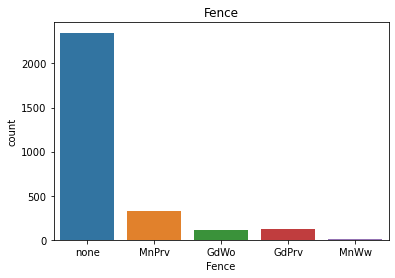

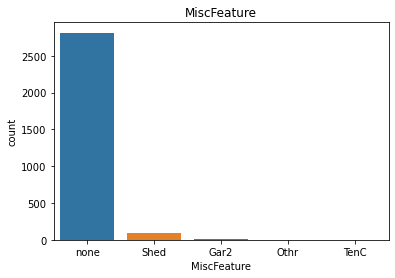

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in objects.columns:
    if len(set(objects[i])) <= 5:
        plt.title(f"{i}")
        ax = sns.countplot(x= i, data=objects)
        plt.show()

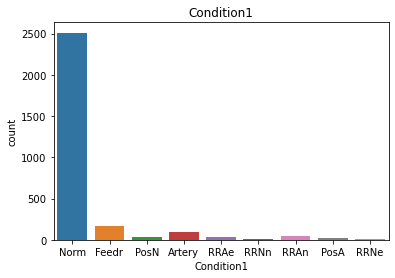

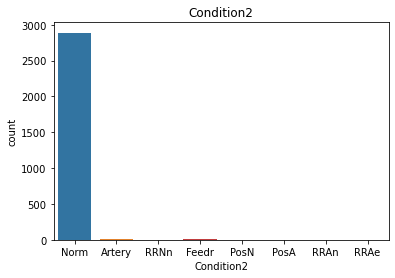

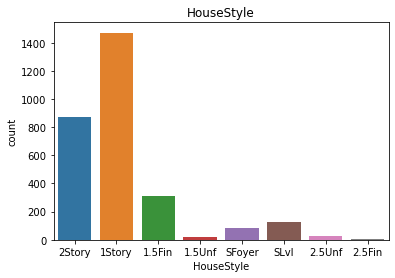

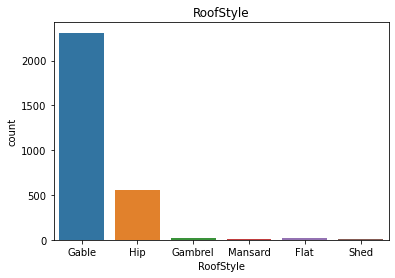

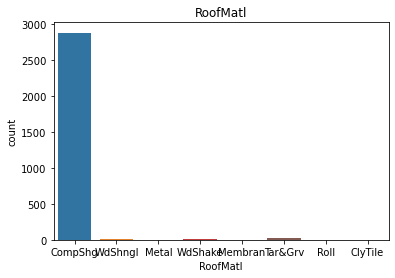

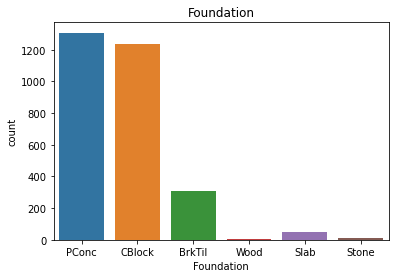

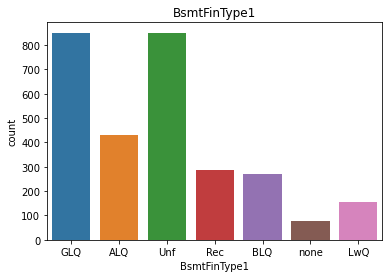

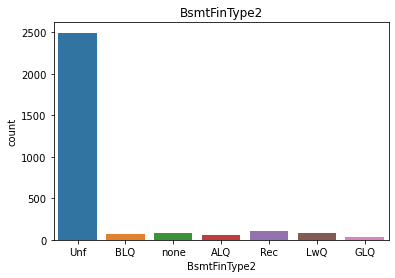

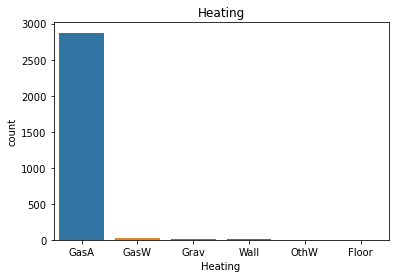

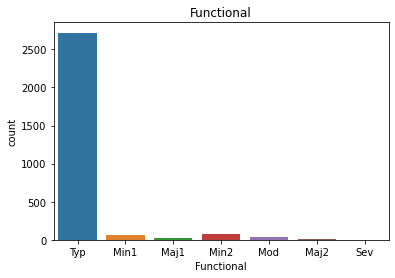

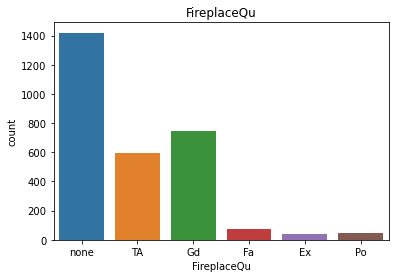

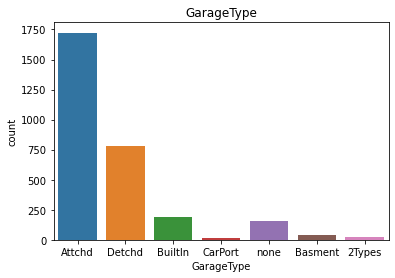

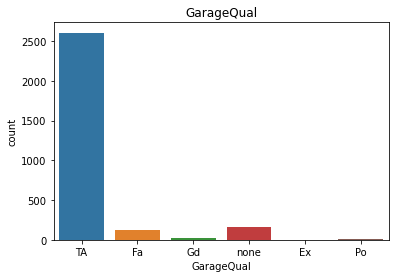

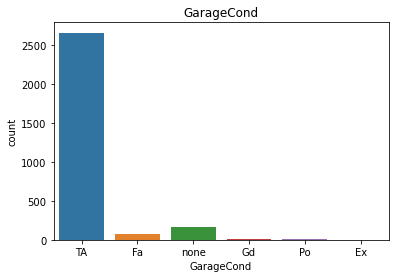

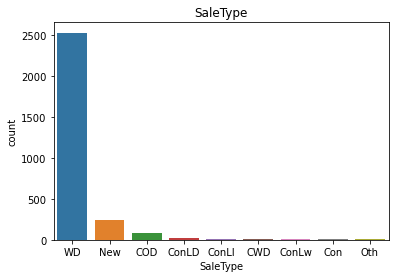

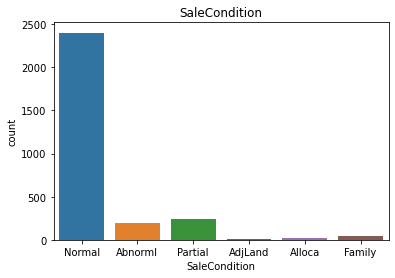

In [18]:
for i in objects.columns:
    if len(set(objects[i])) <= 10 and len(set(objects[i])) > 5:
        plt.title(f"{i}")
        ax = sns.countplot(x= i, data=objects)
        plt.show()

## Removal of non optimal features

1. More none values for **Alley**,**Fence**,**MiscFeature**,**PoolQC**
2. 'Street',,'Utilities','Exterior1st','Exterior2nd','LotConfig','LandSlope','BldgType','Electrical','RoofMatl','BsmtFinType1'
    ,'BsmtFinType2','Functional',Condition1,Condition2

In [19]:
remove = ['Street','Alley','Fence','MiscFeature','PoolQC','Utilities','Exterior1st','Exterior2nd','LotConfig','LandSlope','BldgType','Electrical','RoofMatl','BsmtFinType2','Functional','Condition1','Condition2']

In [20]:
objects = objects.drop(remove,axis =1)

* look at the unique values for changing dtype of the objects

In [21]:
for i in objects.columns:
    print(i,set(list(objects[i])))


MSZoning {'FV', 'C (all)', 'RL', 'RM', 'RH'}
LotShape {'IR2', 'IR1', 'Reg', 'IR3'}
LandContour {'Low', 'Bnk', 'HLS', 'Lvl'}
Neighborhood {'SawyerW', 'OldTown', 'NWAmes', 'StoneBr', 'MeadowV', 'ClearCr', 'Crawfor', 'NoRidge', 'SWISU', 'Blueste', 'Veenker', 'Timber', 'IDOTRR', 'Blmngtn', 'NPkVill', 'Mitchel', 'NridgHt', 'CollgCr', 'NAmes', 'Somerst', 'Edwards', 'Gilbert', 'BrDale', 'Sawyer', 'BrkSide'}
HouseStyle {'2Story', 'SFoyer', '2.5Fin', 'SLvl', '1Story', '2.5Unf', '1.5Unf', '1.5Fin'}
RoofStyle {'Mansard', 'Hip', 'Flat', 'Gambrel', 'Gable', 'Shed'}
MasVnrType {'Stone', 'BrkCmn', 'None', 'BrkFace'}
ExterQual {'Ex', 'Gd', 'TA', 'Fa'}
ExterCond {'Ex', 'TA', 'Po', 'Fa', 'Gd'}
Foundation {'Wood', 'Slab', 'BrkTil', 'Stone', 'CBlock', 'PConc'}
BsmtQual {'Ex', 'TA', 'Fa', 'Gd', 'none'}
BsmtCond {'TA', 'Po', 'Fa', 'Gd', 'none'}
BsmtExposure {'No', 'Gd', 'none', 'Mn', 'Av'}
BsmtFinType1 {'BLQ', 'Unf', 'GLQ', 'ALQ', 'LwQ', 'none', 'Rec'}
Heating {'Floor', 'GasW', 'Wall', 'Grav', 'GasA', 'OthW

In [22]:
MSZoning ={'RL':0, 'FV' :1, 'C (all)':2, 'RM' :3, 'RH':4}
objects['MSZoning'] = objects['MSZoning'].map(MSZoning)



LotShape = {'IR1':0, 'IR2':1, 'IR3':2,'Reg':3}
objects['LotShape'] = objects['LotShape'].map(LotShape)

LandContour = {'Low':0, 'Bnk':1, 'HLS':2, 'Lvl':3}
objects['LandContour'] = objects['LandContour'].map(LandContour)


Neighborhood = {'Veenker':0, 'SWISU':1, 'Blueste':2, 'Gilbert':3, 'MeadowV':4, 'SawyerW':5, 'Blmngtn':6, 'BrDale':7, 'Sawyer':8, 'ClearCr':9, 'IDOTRR':10, 'NAmes':11, 'OldTown':12, 'Somerst':13, 'NridgHt':14, 'NoRidge':15, 'Timber':16, 'StoneBr':17, 'BrkSide':18, 'NPkVill':19, 'Mitchel':20, 'NWAmes':21, 'CollgCr':22, 'Crawfor':23, 'Edwards':24}
objects['Neighborhood'] = objects['Neighborhood'].map(Neighborhood)

BsmtFinType1 ={'BLQ':1, 'ALQ':2, 'LwQ':3, 'Rec':4, 'GLQ':5, 'Unf':6, 'none':0}
objects['BsmtFinType1'] = objects['BsmtFinType1'].map(BsmtFinType1)



HouseStyle = {'2.5Fin':0 , 'SLvl':1, 'SFoyer':2, '2.5Unf':3, '1Story':4, '1.5Fin':5, '2Story':6, '1.5Unf':7}
objects['HouseStyle'] = objects['HouseStyle'].map(HouseStyle)

RoofStyle = {'Gable':0, 'Shed':1, 'Flat':2, 'Mansard':3, 'Hip':4, 'Gambrel':5}
objects['RoofStyle'] = objects['RoofStyle'].map(RoofStyle)

MasVnrType = {'Stone':1, 'BrkFace':2, 'None':0, 'BrkCmn':3}
objects['MasVnrType'] = objects['MasVnrType'].map(MasVnrType)


score = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'none':0,'No':0,'N':0, 'Y':1 }

objects['ExterQual'] = objects['ExterQual'].map(score)
objects['ExterCond'] = objects['ExterCond'].map(score)
objects['BsmtQual'] = objects['BsmtQual'].map(score)
objects['BsmtCond'] = objects['BsmtCond'].map(score)
objects['BsmtExposure'] = objects['BsmtExposure'].map(score)
objects['GarageQual'] = objects['GarageQual'].map(score)
objects['GarageCond'] = objects['GarageCond'].map(score)
objects['PavedDrive'] = objects['PavedDrive'].map(score)
objects['HeatingQC'] = objects['HeatingQC'].map(score)
objects['CentralAir'] = objects['CentralAir'].map(score)
objects['KitchenQual'] = objects['KitchenQual'].map(score)
objects['FireplaceQu'] = objects['FireplaceQu'].map(score)


Heating = {'Floor':0, 'Grav':1, 'GasA':2, 'Wall':3, 'GasW':4, 'OthW':5}
objects['Heating'] = objects['Heating'].map(Heating)

Foundation = {'Slab':0, 'Stone':1, 'Wood':2, 'PConc':3, 'CBlock':4, 'BrkTil':5}
objects['Foundation'] = objects['Foundation'].map(Foundation)


GarageType = {'CarPort':1, 'Detchd':2, 'Basment':3,'2Types':4, 'BuiltIn':5, 'Attchd':6, 'none':0}
objects['GarageType'] = objects['GarageType'].map(GarageType)

GarageFinish ={'none':0, 'Unf':1, 'Fin':2, 'RFn':3}
objects['GarageFinish'] = objects['GarageFinish'].map(GarageFinish)

SaleType = {'WD':0, 'New':1, 'Con':2, 'COD':3, 'Oth':4, 'ConLI':5, 'ConLD':6, 'ConLw':7, 'CWD':8}
objects['SaleType'] = objects['SaleType'].map(SaleType)

SaleCondition = {'Abnorml':0, 'Family':1, 'AdjLand':2, 'Normal':3, 'Alloca':4 ,'Partial':5}
objects['SaleCondition'] = objects['SaleCondition'].map(SaleCondition)


Bingo! we have now converted object datatypes into numerical datatypes.

look at them now.

In [23]:
objects.dtypes

MSZoning           int64
LotShape           int64
LandContour        int64
Neighborhood       int64
HouseStyle         int64
RoofStyle          int64
MasVnrType         int64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure     float64
BsmtFinType1       int64
Heating            int64
HeatingQC          int64
CentralAir         int64
KitchenQual        int64
FireplaceQu        int64
GarageType         int64
GarageFinish       int64
GarageQual         int64
GarageCond         int64
PavedDrive       float64
SaleType           int64
SaleCondition      int64
dtype: object

In [24]:
objects.head()

,MSZoning,LotShape,LandContour,Neighborhood,HouseStyle,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,...,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,3,3,22,6,0,2,4,3,3,...,1,4,0,6,3,3,3,1.0,0,3
1,0,3,3,0,4,0,0,3,3,4,...,1,3,3,6,3,3,3,1.0,0,3
2,0,0,3,22,6,0,2,4,3,3,...,1,4,3,6,3,3,3,1.0,0,3
3,0,0,3,23,6,0,0,3,3,5,...,1,4,4,2,1,3,3,1.0,0,0
4,0,0,3,15,6,0,2,4,3,3,...,1,4,3,6,3,3,3,1.0,0,3


Let's clean the numericals data too

In [25]:
numericals.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
train              0
dtype: int64

* Fill **LotFrontage**,**YrSold**  with the mean values.
* Rest all null values can be filled 0. look at the **data_description.txt** for more info about the data. 

In [26]:
print(round((numericals['LotFrontage']).mean()))
print(round((numericals['YrSold']-numericals['YearBuilt']).mean()))

69
36


In [27]:
numericals['GarageYrBlt'] = numericals['GarageYrBlt'].fillna(numericals['YrSold']-36)
numericals['LotFrontage'] = numericals['LotFrontage'].fillna(69)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
numericals = numericals.fillna(0)

In [29]:
numericals.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
train            0
dtype: int64

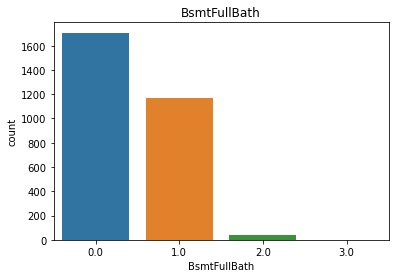

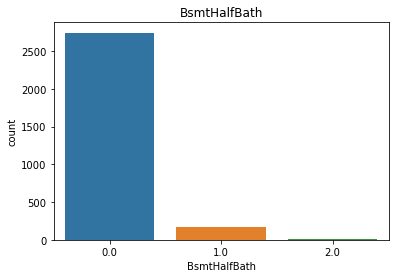

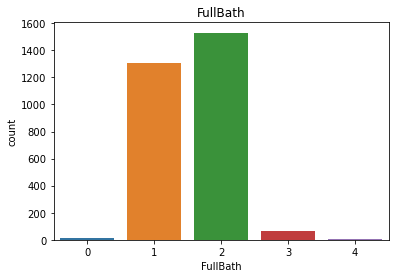

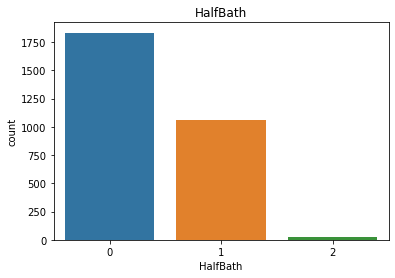

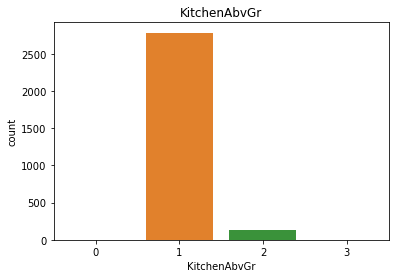

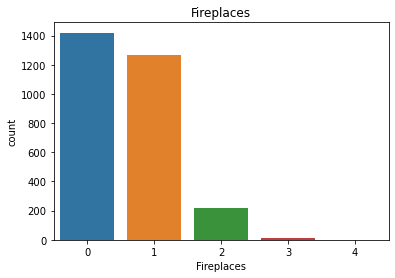

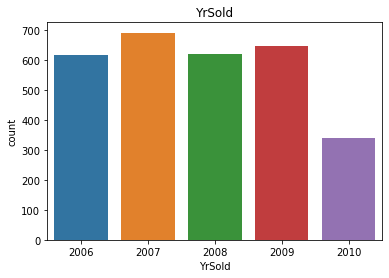

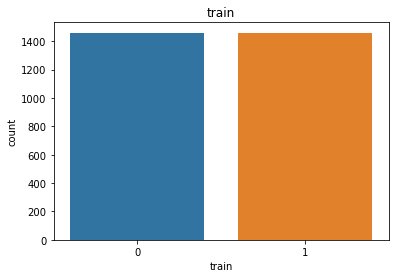

In [30]:
for i in numericals.columns:
    if len(set(numericals[i])) <= 5:
        plt.title(f"{i}")
        ax = sns.countplot(x= i, data=numericals)
        plt.show()

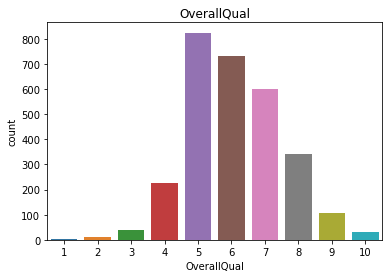

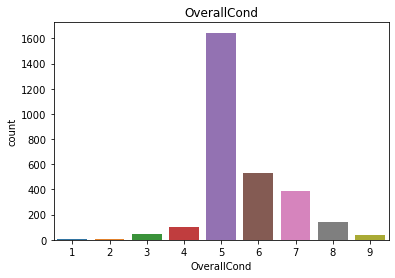

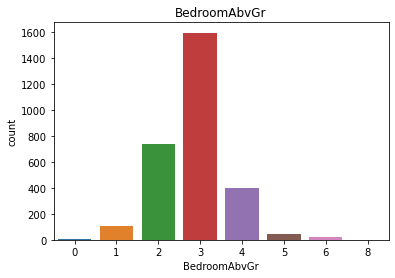

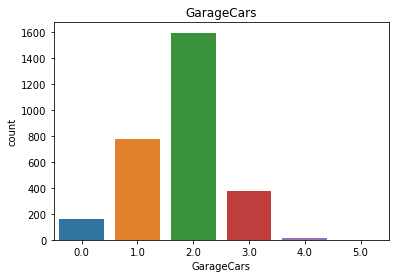

In [31]:
for i in numericals.columns:
    if len(set(numericals[i])) <= 10 and len(set(numericals[i])) > 5:
        plt.title(f"{i}")
        ax = sns.countplot(x= i, data=numericals)
        plt.show()

# Feature Engineering


* The task is to select optimal features.
* Remember Too many features does not increase classifier performance and in turn  decreases  classifier's performance due to [Curse of Dimensionality and other reasons](https://medium.com/analytics-vidhya/feature-engineering-with-the-help-of-data-visualization-69c359f5bba5)

* Concat the data and drop Id from the data

In [32]:
data = pd.concat([objects,numericals],axis =1)
data = data.drop(['Id'],axis =1)


In [33]:
data.shape

(2919, 63)

### Let's Engineer the features



#### Check **data_description.txt**
* **OverallQual**,**OverallCond** can be clubbed and made a feature.
* **ExterQual**,**ExterCond** can be clubbed and made a feature.
* **BsmtCond**,**BsmtQual**,**BsmtExposure** can be clubbed and made a feature.
* **GarageQual**,**GarageCond** can be clubbed and made a feature.


In [34]:
data['OverallQualandCond']= (data['OverallQual']+data['OverallCond'])
data['ExterQualandCond']= (data['ExterQual']+data['ExterCond'])
data['BsmtAll']= (data['BsmtCond']+data['BsmtQual']+data['BsmtExposure'])
data['GarageQualandCond']= (data['GarageQual']+data['GarageCond'])


In [35]:
data = data.drop(['OverallQual','OverallCond','ExterQual','ExterCond','BsmtCond','BsmtQual','BsmtExposure','GarageQual','GarageCond'],axis =1)

In [36]:
data.shape

(2919, 58)

In [37]:

train = data[data['train'] == 1]
train = train.drop(['train',],axis=1)

test = data[data['train'] == 0]
test = test.drop(['train',],axis=1)

## Model Selection and Evaluation

* Let's Train and Test our model on the train data first and look for the error
* later train our model on entire train data and submit our predictions

In [38]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import math
import sklearn.metrics as metrics

x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.25,random_state=42)

In [39]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(x_train,y_train)
predictions = xgb_model.predict(x_test)

In [40]:
print('Root Mean Square Error for  Log of pred and true = ' + str(math.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(predictions)))))

Root Mean Square Error for  Log of pred and true = 0.14411261256973154


Train on total dataset

In [41]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(train,y)
predict = xgb_model.predict(test)

In [42]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predict
    })
submission.to_csv('submission.csv', index=False)